# Detailed EDA for Restaurant Cuisine Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/My\ Drive/


'3409_12A_Akhil Bhooshan Khare_Father.jpeg'   MDG.gsheet
'3409_12A_Bhavna Khare_Mother.jpeg'	     'ms Part3.SLDPRT'
'3409_12A_Vihaan Khare_child.jpeg'	      Passportphoto.pdf
 Cap.SLDPRT				     'Pending links.gdoc'
'certificate (1).pdf'			      photos
'Colab Notebooks'			     'photo vihaan khare.jpeg'
 Cuisine_rating.csv			      q3.pdf
 detailed_restaurant_cuisine_eda.ipynb	     'seat allotment (1).pdf'
'DSA spreadsheet.gsheet'		     'seat allotment.pdf'
 HAPPY_BIRTHDAY_VIHAAN.mp4		      title_page-Budhayan.DRWDOT
 IMPORTANT				      Upload
'jee main result.pdf'


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/My Drive/Cuisine_rating.csv')

print(df.head())
print(df.isnull().sum())
df_clean = df.dropna()
print(df.dtypes)
print(df.describe())

   User ID  Area code            Location  Gender   YOB Marital Status  \
0        1        153  Upper East Side,NY  Female  2006         Single   
1        2        123       St. George,NY  Female  1991        Married   
2        3        122  Upper West Side,NY    Male  1977         Single   
3        4        153  Upper East Side,NY  Female  1956        Married   
4        5        129     Central Park,NY    Male  1997         Single   

       Activity  Budget  Cuisines  Alcohol     Smoker  Food Rating  \
0  Professional       3  Japanese     Never     Never            5   
1       Student       3    Indian     Never  Socially            1   
2       Student       5   Seafood     Often     Often            5   
3  Professional       5  Japanese     Never  Socially            3   
4       Student       4  Filipino  Socially     Never            2   

   Service Rating  Overall Rating Often A S  
0               4             4.5        No  
1               1             1.0        N

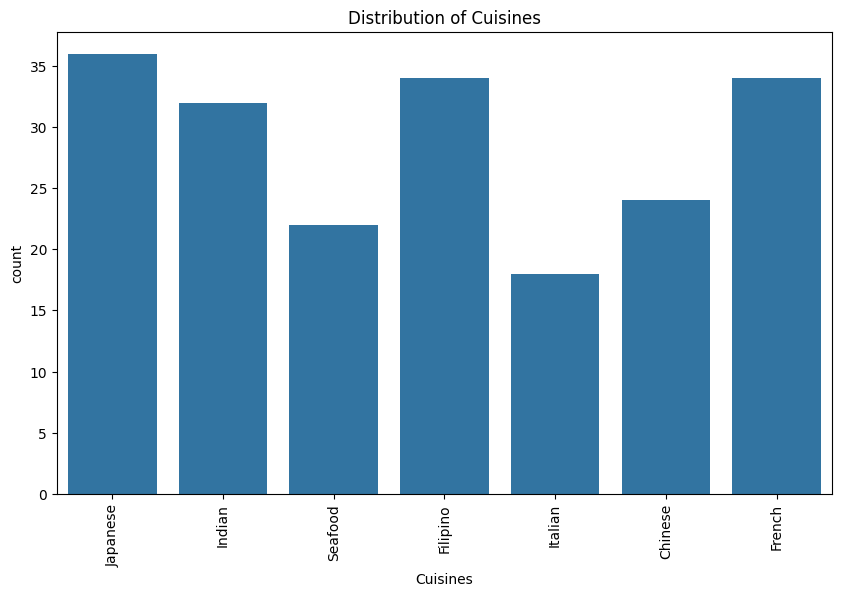

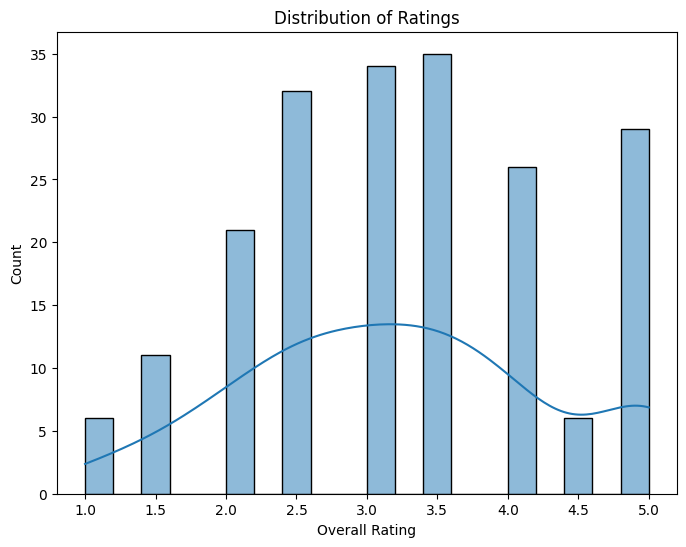

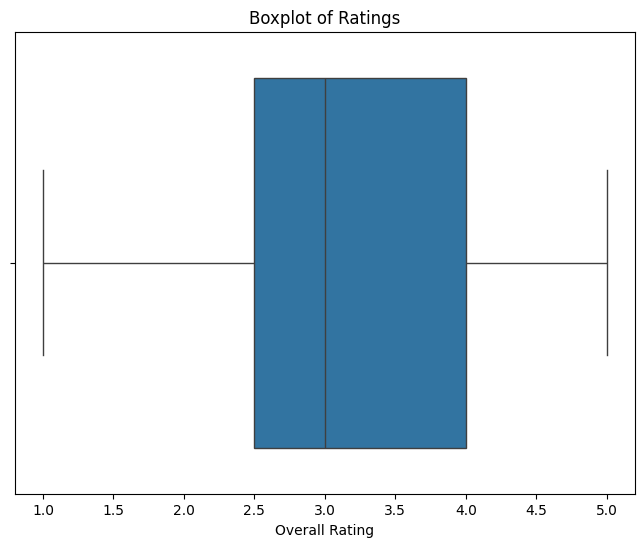

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Cuisines')
plt.xticks(rotation=90)
plt.title('Distribution of Cuisines')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Overall Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['Overall Rating'])
plt.title('Boxplot of Ratings')
plt.show()

if 'Votes' in df_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_clean['Votes'], bins=20, kde=True)
    plt.title('Distribution of Votes')
    plt.show()


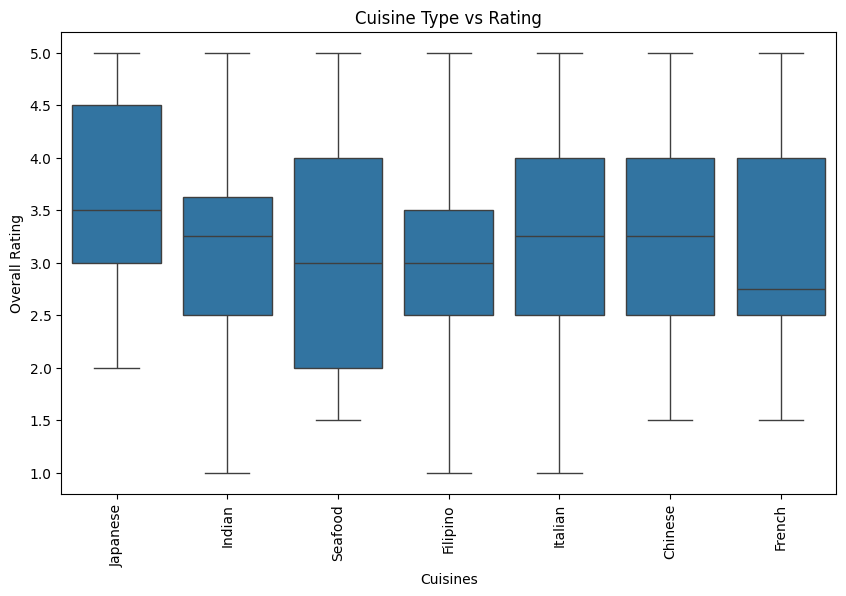

In [20]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='Cuisines', y='Overall Rating', data=df_clean)
plt.xticks(rotation=90)
plt.title('Cuisine Type vs Rating')
plt.show()


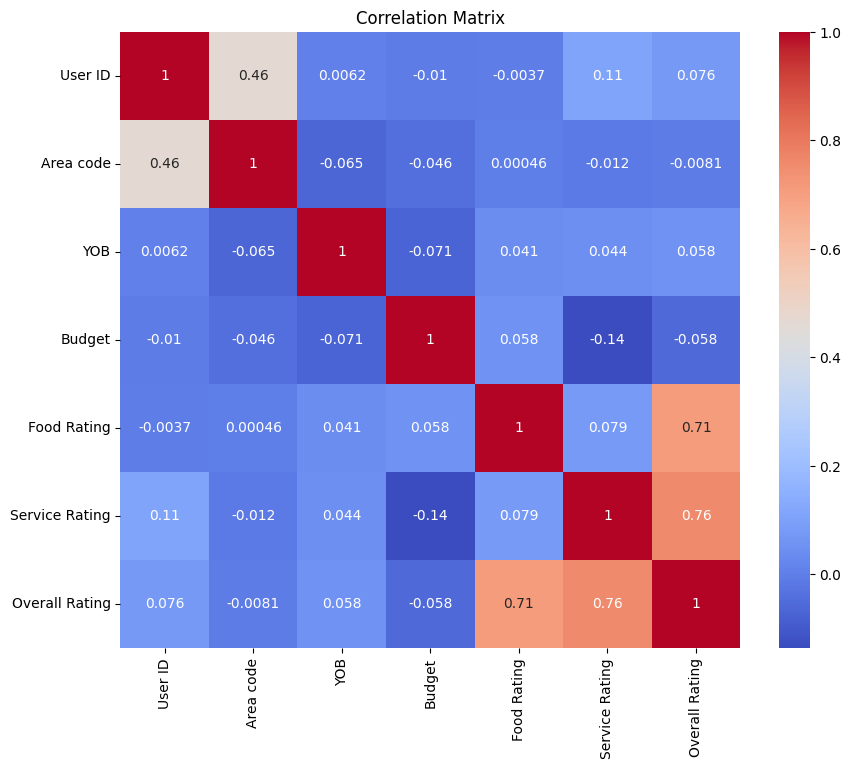

In [31]:
plt.figure(figsize=(10, 8))

numeric_cols = df_clean.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [45]:

cuisine_1 = df_clean[df_clean['Cuisines'] == 'Italian']['Overall Rating']
cuisine_2 = df_clean[df_clean['Cuisines'] == 'Indian']['Overall Rating']

t_stat, p_val_ttest = stats.ttest_ind(cuisine_1, cuisine_2)
print(f'T-test statistic: {t_stat}, p-value: {p_val_ttest}')

df_clean['Rating_Category'] = pd.cut(df_clean['Overall Rating'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])

contingency_table = pd.crosstab(df_clean['Cuisines'], df_clean['Rating_Category'])
chi2_stat, p_val_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square statistic: {chi2_stat}, p-value: {p_val_chi2}')

anova_stat, p_val_anova = stats.f_oneway(
    df_clean[df_clean['Cuisines'] == 'Italian']['Overall Rating'],
    df_clean[df_clean['Cuisines'] == 'Indian']['Overall Rating'],
    df_clean[df_clean['Cuisines'] == 'Chinese']['Overall Rating']
)
print(f'ANOVA statistic: {anova_stat}, p-value: {p_val_anova}')



T-test statistic: 0.06916803989736536, p-value: 0.9451432137347009
Chi-Square statistic: 18.22873526345079, p-value: 0.10891978448818056
ANOVA statistic: 0.059120205382018225, p-value: 0.9426398093592828


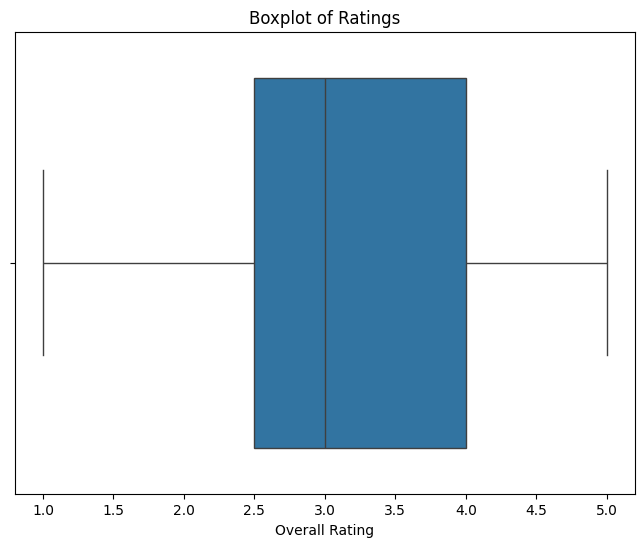

(200, 15)


In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['Overall Rating'])
plt.title('Boxplot of Ratings')
plt.show()

q1 = df_clean['Overall Rating'].quantile(0.25)
q3 = df_clean['Overall Rating'].quantile(0.75)
iqr = q3 - q1
df_clean_no_outliers = df_clean[(df_clean['Overall Rating'] >= q1 - 1.5 * iqr) & (df_clean['Overall Rating'] <= q3 + 1.5 * iqr)]
print(df_clean_no_outliers.shape)


In [39]:
cuisine_1 = df_clean[df_clean['Cuisines'] == 'Italian']['Overall Rating']
cuisine_2 = df_clean[df_clean['Cuisines'] == 'Indian']['Overall Rating']
t_stat, p_val = stats.ttest_ind(cuisine_1, cuisine_2)
print(f'T-test statistic: {t_stat}, p-value: {p_val}')


T-test statistic: 0.06916803989736536, p-value: 0.9451432137347009


In [40]:
df_clean['Rating_Category'] = pd.cut(df_clean['Overall Rating'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(df_clean['Cuisines'], df_clean['Rating_Category'])
chi2_stat, p_val_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-Square statistic: {chi2_stat}, p-value: {p_val_chi2}')


Chi-Square statistic: 18.22873526345079, p-value: 0.10891978448818056


In [41]:
anova_stat, p_val_anova = stats.f_oneway(
    df_clean[df_clean['Cuisines'] == 'Italian']['Overall Rating'],
    df_clean[df_clean['Cuisines'] == 'Indian']['Overall Rating'],
    df_clean[df_clean['Cuisines'] == 'Chinese']['Overall Rating']
)
print(f'ANOVA statistic: {anova_stat}, p-value: {p_val_anova}')


ANOVA statistic: 0.059120205382018225, p-value: 0.9426398093592828


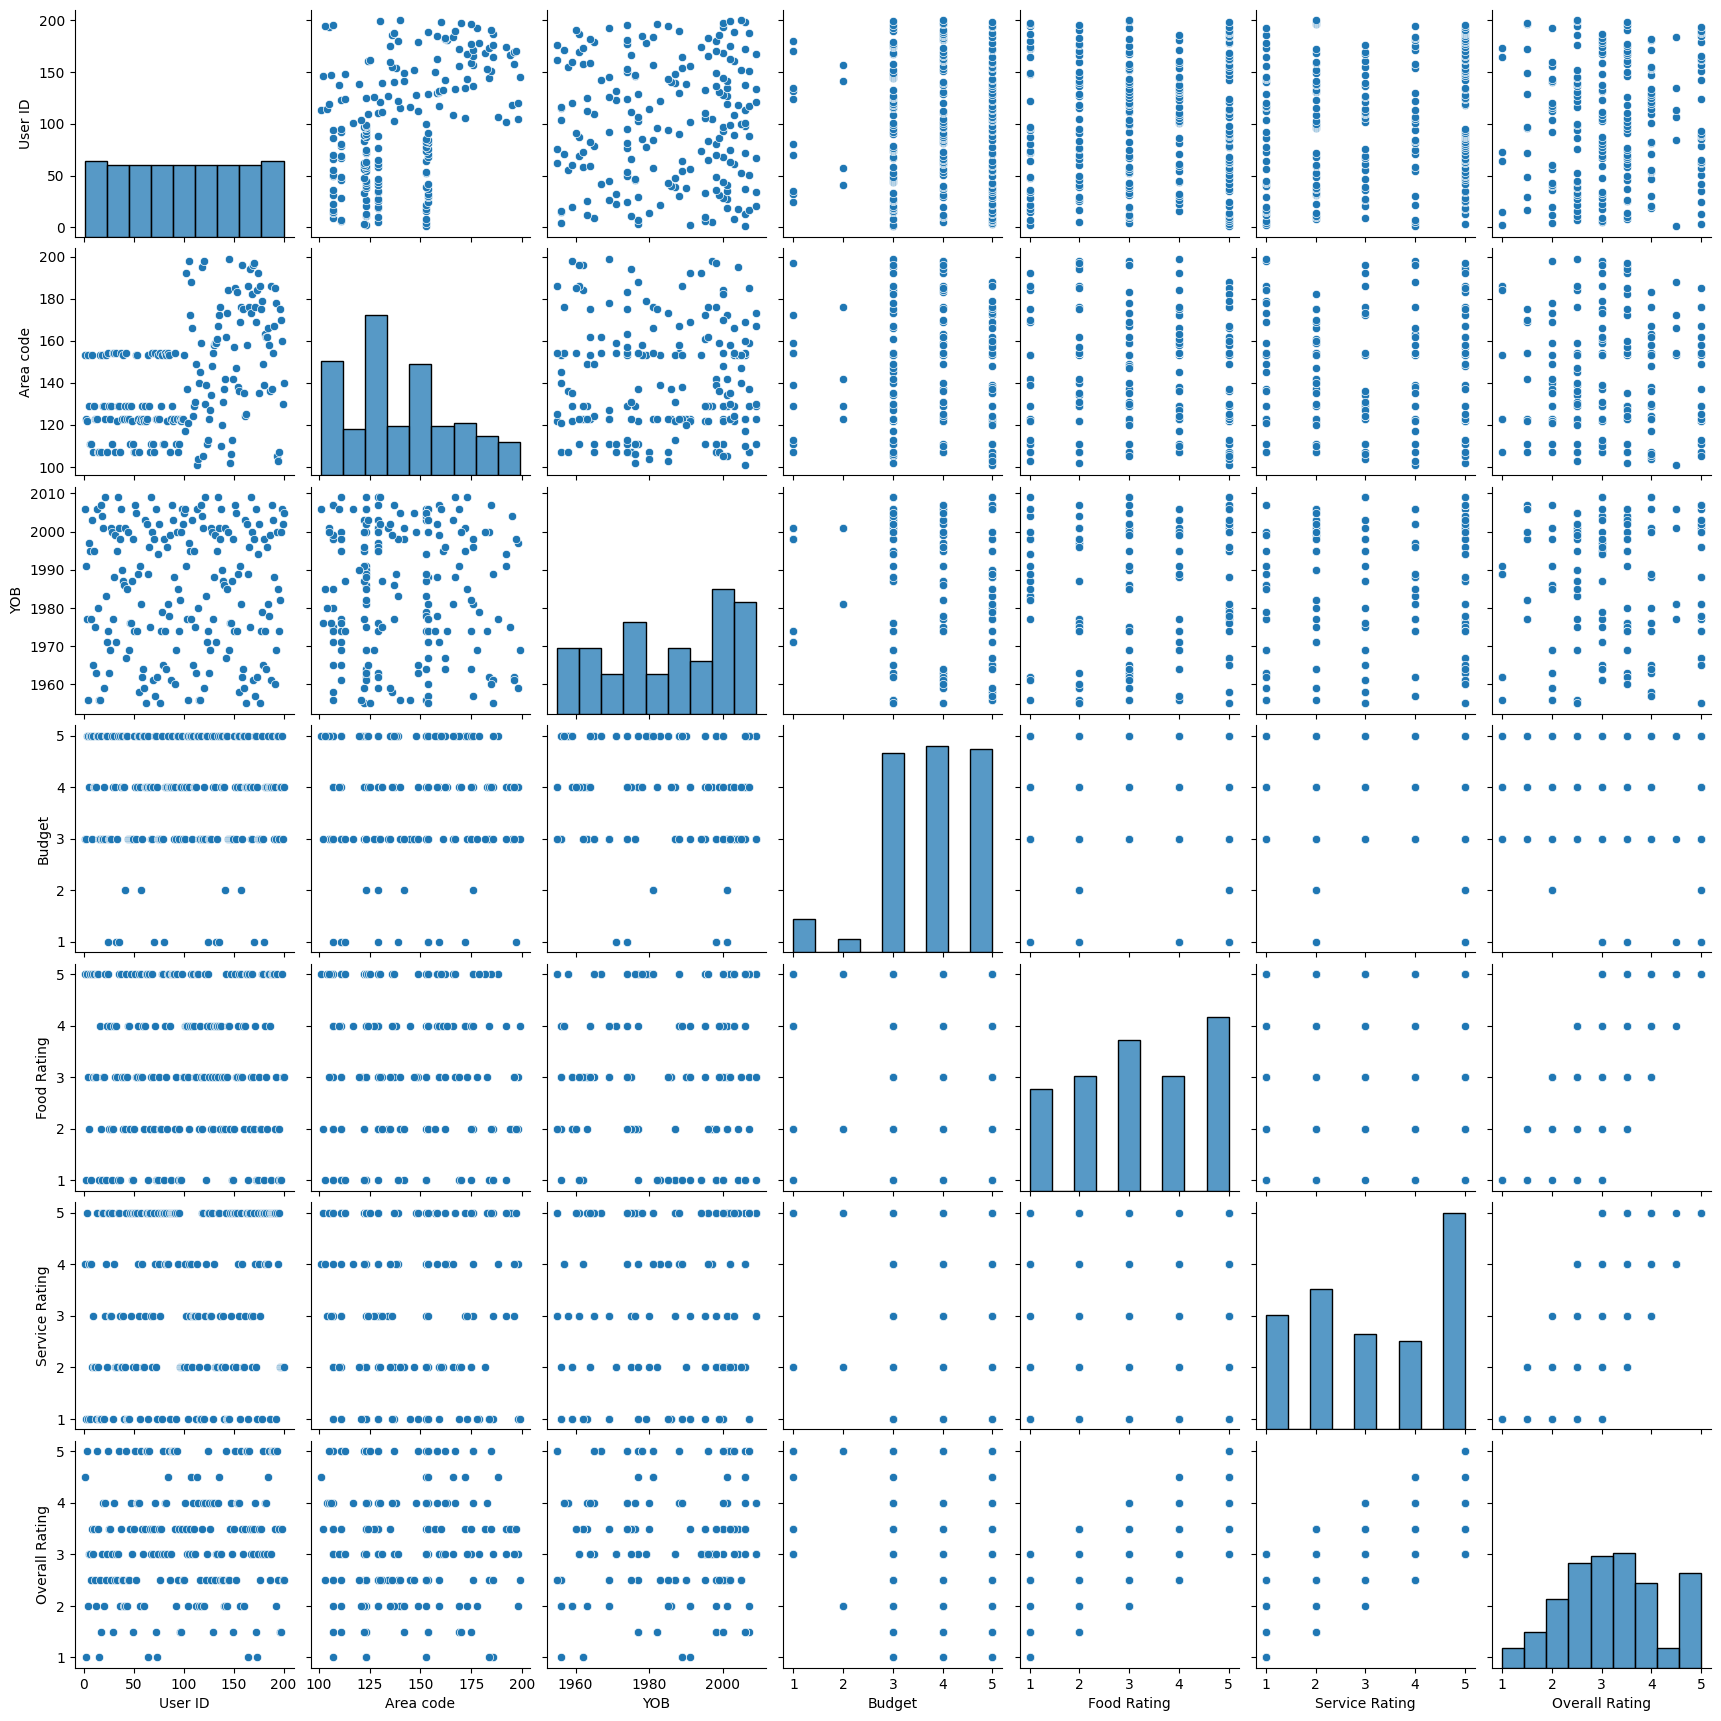

In [29]:
sns.pairplot(df_clean)
plt.show()

In [43]:
le = LabelEncoder()
df_clean['Cuisine_Type_encoded'] = le.fit_transform(df_clean['Cuisines'])

In [44]:

cuisine_1 = df_clean[df_clean['Cuisines'] == 'Italian']['Overall Rating']
cuisine_2 = df_clean[df_clean['Cuisines'] == 'Indian']['Overall Rating']

mean_diff = cuisine_1.mean() - cuisine_2.mean()
std_error = np.sqrt(cuisine_1.var() / len(cuisine_1) + cuisine_2.var() / len(cuisine_2))
z_score = mean_diff / std_error
p_val_z = stats.norm.sf(abs(z_score)) * 2

print(f'Z-test statistic: {z_score}, p-value: {p_val_z}')


Z-test statistic: 0.06382499259564313, p-value: 0.9491095776137491
